In [1]:
# importing required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# Loading the data
data = pd.read_csv("data.csv")
data.head()

,No.,phi,Ha,Ra,Nu
0,1,0.01,0,1000,6.180
1,2,0.01,0,10000,6.412
2,3,0.01,0,100000,8.348
3,4,0.01,0,1000000,11.716
4,5,0.01,20,1000,6.179


In [3]:
# Features and target
X = data[['phi', 'Ha', 'Ra']].values
y = data['Nu'].values

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential([
    Dense(32, activation='tanh', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [9]:
# training model
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=4,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 59.2219 - mae: 7.5272 - val_loss: 65.0320 - val_mae: 7.8827
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.1417 - mae: 7.1274 - val_loss: 58.6900 - val_mae: 7.4827
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.6505 - mae: 6.7428 - val_loss: 52.3645 - val_mae: 7.0687
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.2723 - mae: 6.3444 - val_loss: 46.2815 - val_mae: 6.6439
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.6966 - mae: 5.9146 - val_loss: 40.1290 - val_mae: 6.1749
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.0696 - mae: 5.4211 - val_loss: 33.2536 - val_mae: 5.6199
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.0539 - mae: 4.8493 - val_loss: 26.5105 - val_mae: 5.0082
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.2402 - mae: 4.2180 - val_loss: 20.0720 - val_mae: 4.3386
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

In [10]:
# mae of test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}")

Test MAE: 0.0858


In [11]:
# Example: phi=0.01, Ha=50, Ra=1e5
new_data = np.array([[0.01, 50, 1e5]])
new_data_scaled = scaler.transform(new_data)

predicted_Nu = model.predict(new_data_scaled)
print(f"Predicted Nu: {predicted_Nu[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Nu: 6.6982


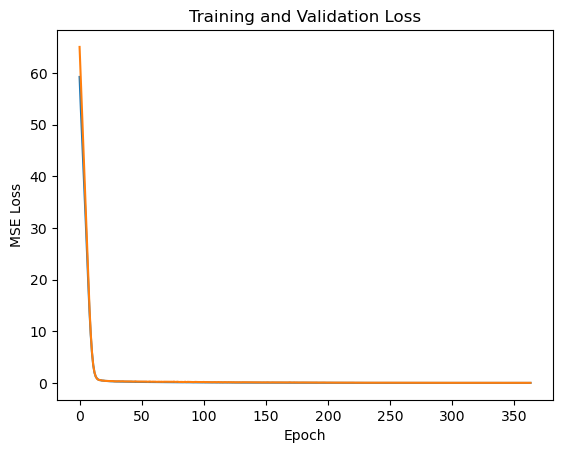

In [12]:
# training and validation loss of training data
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss")
plt.show()

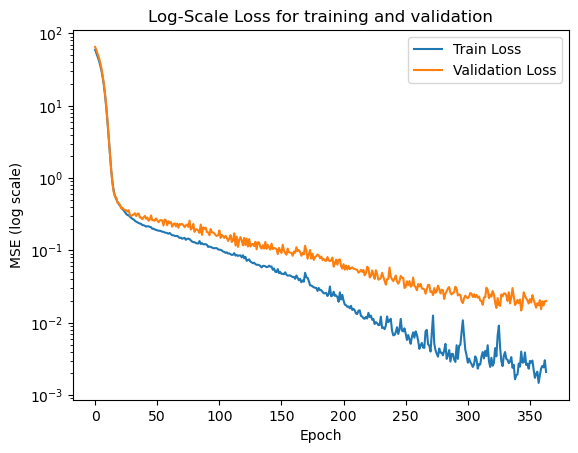

In [13]:
# log loss of train and test data
plt.figure()
plt.semilogy(history.history['loss'], label='Train Loss')
plt.semilogy(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE (log scale)")
plt.title("Log-Scale Loss for training and validation")
plt.legend()
plt.show()

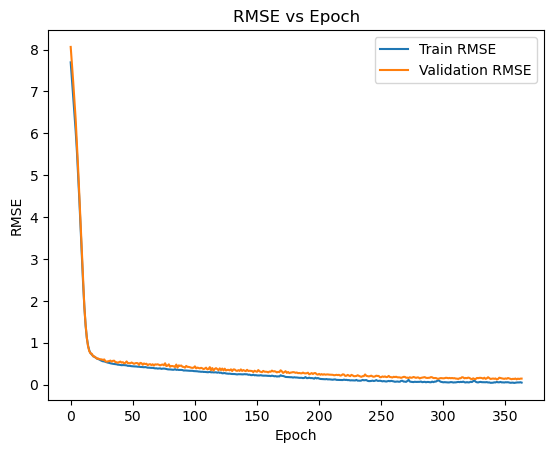

In [14]:
# Error vs Epoch (RMSE)
train_rmse = np.sqrt(history.history['loss'])
test_rmse = np.sqrt(history.history['val_loss'])

plt.figure()
plt.plot(train_rmse, label='Train RMSE')
plt.plot(test_rmse, label='Validation RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE vs Epoch")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


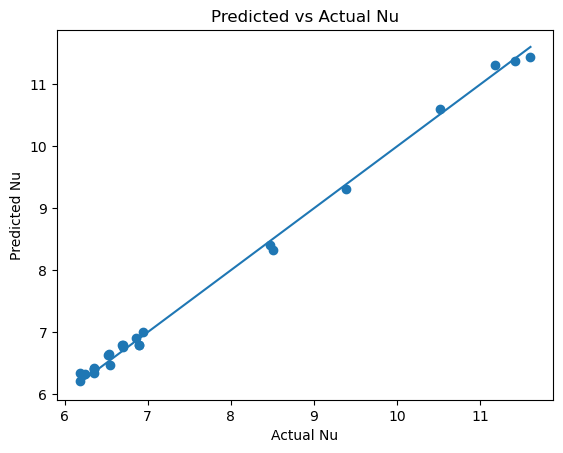

In [15]:
# test data prediction
y_test_pred = model.predict(X_test).flatten()

plt.figure()
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Nu")
plt.ylabel("Predicted Nu")
plt.title("Predicted vs Actual Nu")
plt.show()

In [16]:
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()
# R2 calculation
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


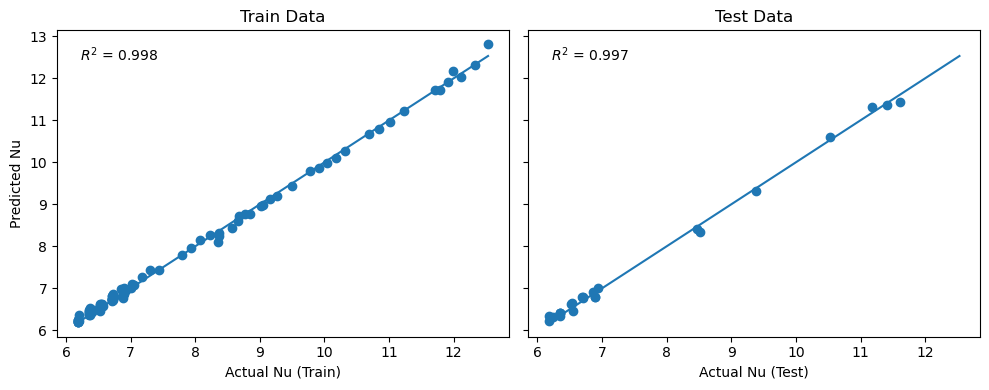

In [17]:
# train vs test
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Train 
plt.sca(axes[0])
plt.scatter(y_train, y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual Nu (Train)")
plt.ylabel("Predicted Nu")
plt.title("Train Data")
plt.text(
    0.05, 0.90, f"$R^2$ = {r2_train:.3f}",
    transform=axes[0].transAxes,
    fontsize=10
)

# Test 
plt.sca(axes[1])
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual Nu (Test)")
plt.title("Test Data")
plt.text(
    0.05, 0.90, f"$R^2$ = {r2_test:.3f}",
    transform=axes[1].transAxes,
    fontsize=10
)

plt.tight_layout()
plt.show()

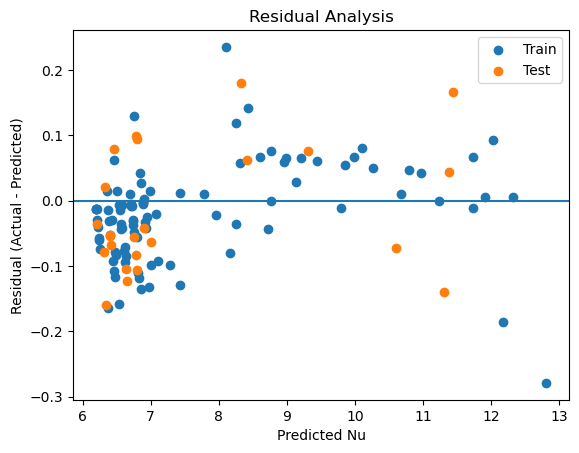

In [18]:
# Residuals (Train vs Test)
plt.figure()
plt.scatter(y_train_pred, y_train - y_train_pred, label='Train')
plt.scatter(y_test_pred, y_test - y_test_pred, label='Test')
plt.axhline(0)
plt.xlabel("Predicted Nu")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Analysis")
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


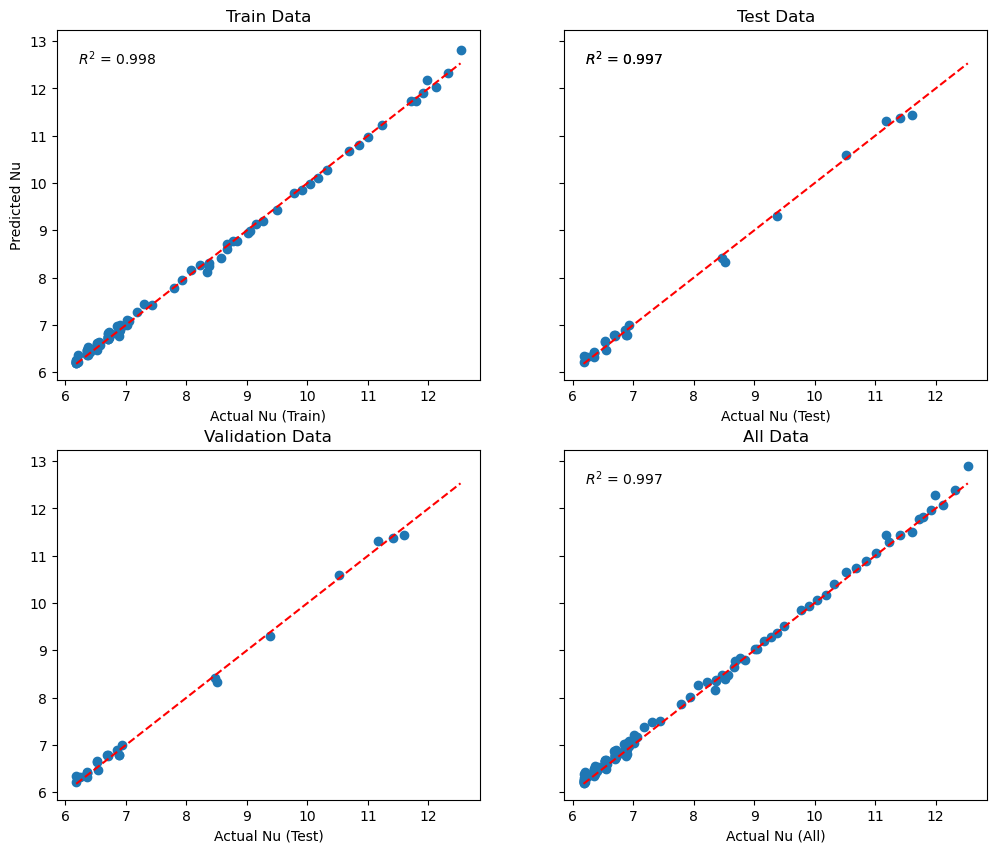

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Train
plt.sca(axes[0, 0])
plt.scatter(y_train, y_train_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (Train)")
plt.ylabel("Predicted Nu")
plt.title("Train Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_train:.3f}", transform=axes[0, 0].transAxes, fontsize=10)


# Test
plt.sca(axes[0, 1])
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (Test)")
plt.title("Test Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_test:.3f}", transform=axes[0, 1].transAxes, fontsize=10)

# Validation
plt.sca(axes[1, 0])
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (Test)")
plt.title("Validation Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_test:.3f}", transform=axes[0, 1].transAxes, fontsize=10)


# All data
y_pred = model.predict(scaler.fit_transform(X)).flatten()
r2_all  = r2_score(y, y_pred)
plt.sca(axes[1, 1])
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Nu (All)")
plt.title("All Data")
plt.text(0.05, 0.90, f"$R^2$ = {r2_all:.3f}", transform=axes[1, 1].transAxes, fontsize=10)

#plt.tight_layout()
plt.show()


In [21]:
Ra_vals = np.array([1e3, 1e4, 1e5, 1e6])
Ha_fixed = 20
phis = [0.01, 0.05]

In [22]:
def avg_nu_sim(df, phi):
    return [df[(df['phi'] == phi) & (df['Ha'] == Ha_fixed) & (df['Ra'] == Ra)]['Nu'].mean()
    for Ra in Ra_vals]

In [23]:
def avg_nu_ann(phi):
    X = np.column_stack([
        np.full(len(Ra_vals), phi),
        np.full(len(Ra_vals), Ha_fixed),
        Ra_vals
    ])
    Xs = scaler.transform(X)
    return model.predict(Xs).flatten()

In [24]:
Nu_sim_001 = avg_nu_sim(data, 0.01)
Nu_sim_005 = avg_nu_sim(data, 0.05)

In [25]:
Nu_ann_001 = avg_nu_ann(0.01)
Nu_ann_005 = avg_nu_ann(0.05)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


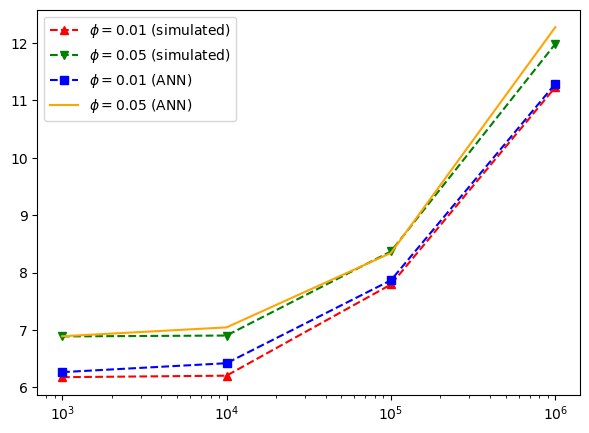

In [26]:
plt.figure(figsize=(7,5))
plt.plot(Ra_vals, Nu_sim_001, 'r--^', label=r'$\phi = 0.01$ (simulated)')
plt.plot(Ra_vals, Nu_sim_005, 'g--v', label=r'$\phi = 0.05$ (simulated)')
plt.plot(Ra_vals, Nu_ann_001, 'b--s', label=r'$\phi = 0.01$ (ANN)')
plt.plot(Ra_vals, Nu_ann_005, 'orange', label=r'$\phi = 0.05$ (ANN)')
plt.xscale('log')
plt.legend()